# EXPLORATORY DATA ANALYSIS (EDA) ON GROCERIES DATASET

In this analysis we will be answering the following questions:
+ Which product is most purchased?
+ Perform Market Basket Analysis (MBA) using the Aprior algorithm to find out which product that can be sold together and thereby conclude on which product that can be used to promote the other.
+ Perform some simple vizualization to aid comprehension.

**Market basket analysis** is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together. It allows us, for instances, identifying products that are frequently bought together (product bundling) and from there building recommendations based on this information (e.g., bundles to offer, which items to present close to each other, how to improve inventory management, which items to upsell).

Market Basket Analysis is also a tool that helps people saving time and having fun. Yes! You read it right. This tool can also be used to build recommendation engines such as the ones used by Netflix and Spotify.



## Data Source

The dataset was gotten from Kaggle at https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset.
The data is stored in csv fromat and dates from the 5th of January 2014 to the 29th of December 2015.
The data is under the General Public License (GPL) 2, stated in this link: https://www.gnu.org/licenses/old-licenses/gpl-2.0.en.html

In [1]:
#reading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

# MBA packages

# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder
# Import Apriori algorithm
from mlxtend.frequent_patterns import apriori
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

In [2]:
#Reading Dataset:
df_groceries = pd.read_csv(r"..\Dataset\Groceries_dataset.csv")
df_groceries

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [3]:
#Checking the number items in the dataframe:
len(df_groceries['itemDescription'].unique().tolist())

167

So we have **167** items.

## Data preprocessing
The data is clean. The only preprocessing we are going to perform is to make the headers have a common fromat.
So we are going to rename the **itemDescription** column into **Item_description** so it can uniform with **Member_number** and **Date** columns.

In [4]:
df_groceries.rename(columns = {'itemDescription':'Item_description'}, inplace = True)
df_groceries

,Member_number,Date,Item_description
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Analysis
Now, let's begin the analysis.
Firstly, we are going to find out the top 10 most bougth products.

<AxesSubplot:title={'center':'Top 10 Most Purchased Products'}, xlabel='count', ylabel='Item_description'>

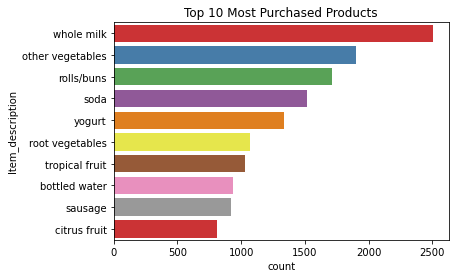

In [5]:
plt.title("Top 10 Most Purchased Products")
plt.rcParams['figure.figsize'] = (10.0, 8.0)
sns.countplot(y= "Item_description", data = df_groceries, palette = "Set1", order=df_groceries.Item_description.value_counts().iloc[:10].index)

From the count chart above, it appears that **whole milk** is the most purchased product.
Now, now let's begin the Market Basket Analysis.
To do this, we will reformat our current table by grouping by **Member_number** in order to know the products each customer has bought.

In [6]:
transactions = df_groceries[['Member_number', 'Item_description']]

In [7]:
# group by member_number and generate dataframe with Item_description 
groceries = transactions.groupby('Member_number')['Item_description'].apply(lambda x: ','.join(x)).reset_index()
groceries

,Member_number,Item_description
0,1000,"soda,canned beer,sausage,sausage,whole milk,wh..."
1,1001,"frankfurter,frankfurter,beef,sausage,whole mil..."
2,1002,"tropical fruit,butter milk,butter,frozen veget..."
3,1003,"sausage,root vegetables,rolls/buns,detergent,f..."
4,1004,"other vegetables,pip fruit,root vegetables,can..."
...,...,...
3893,4996,"dessert,salty snack,rolls/buns,misc. beverages..."
3894,4997,"tropical fruit,white wine,whole milk,curd,grap..."
3895,4998,"rolls/buns,curd"
3896,4999,"bottled water,butter milk,tropical fruit,berri..."


To facilitate calculating **support** and other metrics we one-hot encode our transactions. For this let's use our first mlxtend tool: TransactionEncoder in the following function.

In [8]:
# Let's crate a function
def onehot_encode_transactions(transactions_column):
    """ Transform transactions dataframe into a one-hot encode dataframe 
    where each column consists of TRUE and FALSE values that indicate 
    whether an item was included or not in a transaction.  

    Parameters
    ----------
    transactions_column : series
        Column of dataframe consisting of transactions
        

    Returns
    -------
        dataframe

    """
    
    
    # create a list of sublists where each sublist has items in a transaction
    transactions = transactions_column.apply(lambda t: str(t).split(','))
    
    # Instantiate transaction encoder and identify unique items
    encoder = TransactionEncoder().fit(transactions)

    # One-hot encode transactions
    onehot = encoder.transform(transactions)

    # Convert one-hot encoded data to DataFrame
    onehot = pd.DataFrame(onehot, columns = encoder.columns_)

    return onehot

In [9]:
# One-hot encoded dataframe
onehot_groceries = onehot_encode_transactions(groceries["Item_description"])

onehot_groceries

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


Let's apply the Apriori algorithm pruning and generate frequent item sets with a minimum `support` 0.005 and a maximum `item number` threshold 2.

In [10]:
# Apply the Apriori algorithm with a support value of 0.005
frequent_itemsets = apriori(onehot_groceries, 
                            min_support = 0.005,           
                            use_colnames = True, 
                            max_len = 2)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets

,support,itemsets,length
0,0.015393,(Instant food products),1
1,0.078502,(UHT-milk),1
2,0.005644,(abrasive cleaner),1
3,0.007440,(artif. sweetener),1
4,0.031042,(baking powder),1
...,...,...,...
2235,0.023602,"(whole milk, white wine)",2
2236,0.016419,"(white wine, yogurt)",2
2237,0.150590,"(whole milk, yogurt)",2
2238,0.009236,"(whole milk, zwieback)",2


In [11]:
len(frequent_itemsets)

2240

We can try different values, check the number of frequent item sets and pick the value of support that provides us a convenient number of item sets. Is 2240 too much? Then pick a higher `min_support`. Tweaking the number of items is also a way to reduce, allowing less items will produce less frequent item sets.

A good way to have an idea on the range of values you can use for support is to plot a `scatterplot` using support x confidence. This because Bayardo and Agrawal showed in their [1999 paper](http://rakesh.agrawal-family.com/papers/kdd99rules.pdf) that the best-performing rules along a variety of common metrics, including the ones we explored here, must be located on the confidence-support border. 

The scatterplot below includes also a third dimension, i.e., another metric: lift. Observe that the values support goes until around 0.2, and most of the point are below support 0.125

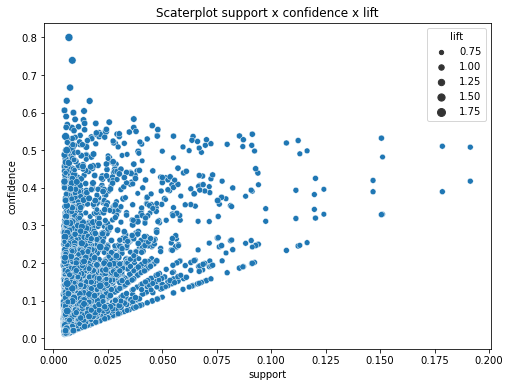

In [12]:
# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, 
                          metric = 'support', 
                          min_threshold = 0.00)

# Generate scatterplot using support and confidence
plt.figure(figsize=(8,6))
plt.title("Scaterplot support x confidence x lift")
sns.scatterplot(x = "support", 
                y = "confidence", 
                size = "lift",
                data = rules)
plt.show()

In [13]:
# Compute frequent itemsets using a minimum support of 0.1
frequent_itemsets_1 = apriori(onehot_groceries, 
                            min_support = 0.1,
                            max_len = 2,
                            use_colnames = True )

frequent_itemsets_1['length'] = frequent_itemsets_1['itemsets'].apply(lambda x : len(list(x)))

frequent_itemsets_1.head()

,support,itemsets,length
0,0.119548,(beef),1
1,0.158799,(bottled beer),1
2,0.213699,(bottled water),1
3,0.135967,(brown bread),1
4,0.126475,(butter),1


In [14]:
len(frequent_itemsets_1)

42

First, let's generate association rules without pruning, i.e., `min_threshold = 0.0`.

In [15]:
# Compute the association rules for frequent_itemsets_1 without pruning 
rules_1 = association_rules(frequent_itemsets_1, 
                          metric = 'support', 
                          min_threshold = 0.0)
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled water),0.458184,0.213699,0.112365,0.245241,1.147597,0.014452,1.041790
1,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
2,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502
3,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197
4,(other vegetables),(soda),0.376603,0.313494,0.124166,0.329700,1.051695,0.006103,1.024178
5,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,0.006103,1.032237
6,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
7,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
8,(other vegetables),(yogurt),0.376603,0.282966,0.120318,0.319482,1.129050,0.013752,1.053660
9,(yogurt),(other vegetables),0.282966,0.376603,0.120318,0.425204,1.129050,0.013752,1.084553


Now that we have our association rules let's consider some possible use cases to illustrate the use of MBA and what we've learnt so far.

The first we are going to be looking at is **Bundling**.

## Product Bundling:
Product bundling is a technique in which several products are grouped together and sold as a single unit for one price.
Let's say we would like to find two items to be sold together.

We can start by inspecting the table above for high support values. But even better, we can use a `heatmap` to spot it faster which values are interesting for us.

A heatmap as below is useful to help us during the pruning process because it helps us in visualizing the intensity of the relationships between pairs of objects, i.e., the value of a metric of association rules between antecedent and consequent.

In [16]:
# Replace frozen sets with strings
rules_1['antecedents'] = rules_1['antecedents'].apply(lambda x: ','.join(list(x)))
rules_1['consequents'] = rules_1['consequents'].apply(lambda x: ','.join(list(x)))

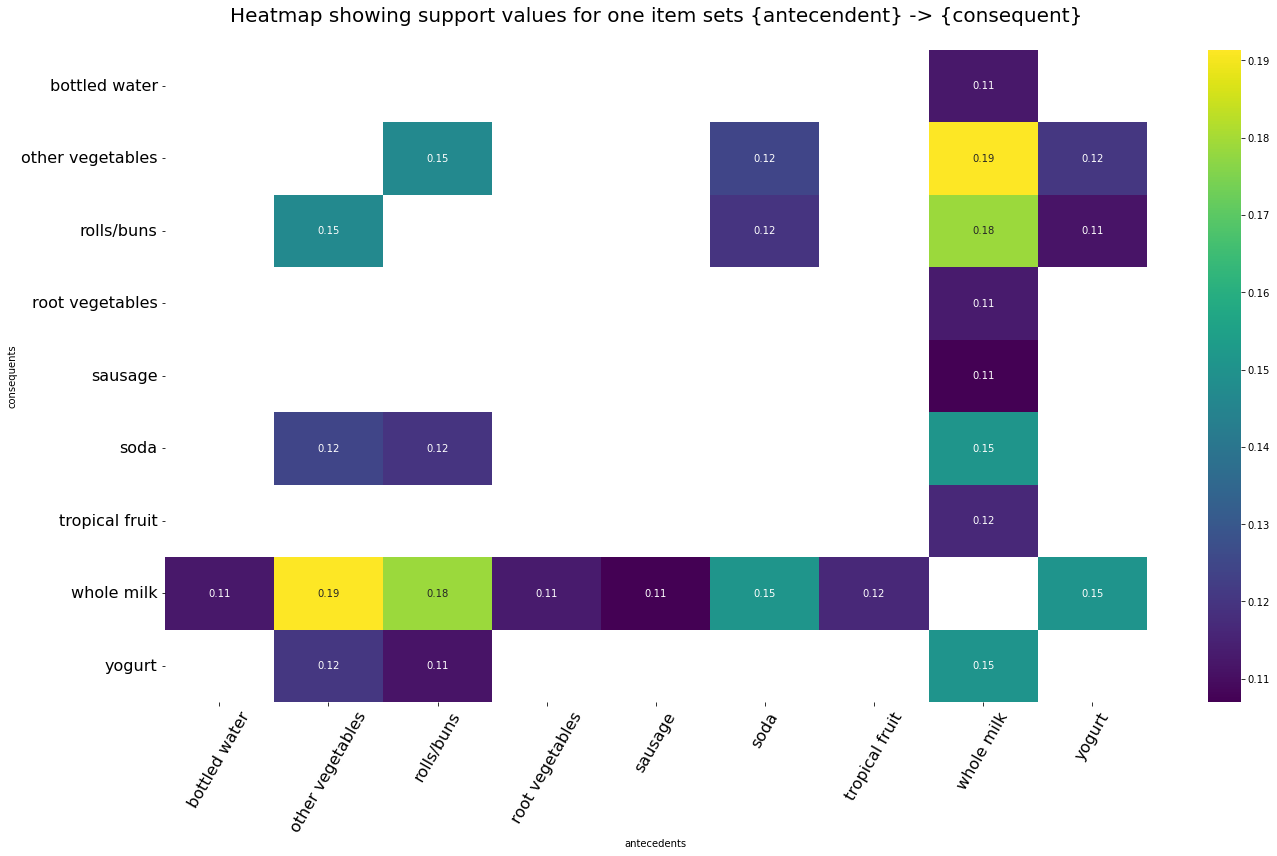

In [17]:
# Transform data to matrix format and generate heatmap
pivot = rules_1.pivot(index='consequents', columns='antecedents', values='support')
# sns.heatmap(pivot)

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(22,12))
plt.title("Heatmap showing support values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='viridis')

# Format and display plot
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

The heatmap above shows values of support for the association rules. Darker colors mean lower intensity, lighter color higher intensity, and white means that no association rule was identified for that itemset. We can easily see high support for the association rule $\{ whole\ milk\} \rightarrow \{other\ vegetables\}$, and vice-versa.

In [18]:
# Apply a 0.18 antecedent support threshold, 0.20 confidence threshold, and 1.10 lift threshold
filtered_rules_1 = rules_1[(rules_1['support'] > 0.18) &
                           (rules_1['confidence'] > 0.2) &
                           (rules_1['lift'] > 1.10)]


In [19]:
filtered_rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,whole milk,other vegetables,0.458184,0.376603,0.19138,0.417693,1.109106,0.018827,1.070564
7,other vegetables,whole milk,0.376603,0.458184,0.19138,0.508174,1.109106,0.018827,1.101643


After filtering with multiple metrics, we confirm that selling these products together is a good option. We have high lift that tells us that this bundle is viable because it does not happen by chance.

## Cross-promotion

What if we decide we want to use one of these products to promote the other?

From the filtered rules above we can see that the best choice is to use **other vegetables** to promote **whole milk**. Confidence tells us that we can be over 50% confident that someone that buys **other vegetables** will also buy **whole milk**.

The heatmap using confidence values confirms it.

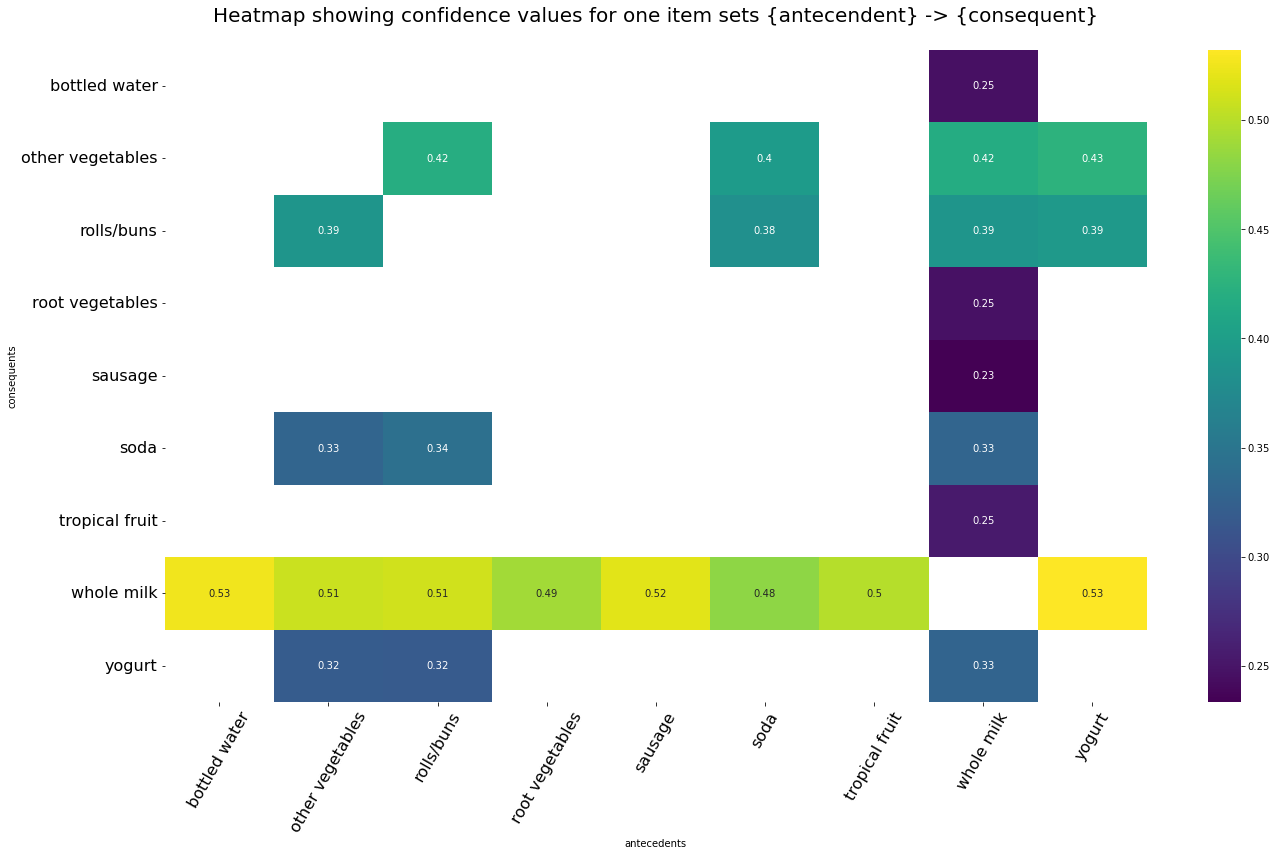

In [20]:
# Transform data to matrix format and generate heatmap
pivot = rules_1.pivot(index='consequents', columns='antecedents', values='confidence')
# sns.heatmap(pivot)

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(22,12))
plt.title("Heatmap showing confidence values for one item sets {antecendent} -> {consequent}\n", size = 20)
sns.heatmap(pivot, annot = True, cbar = True, cmap='viridis')

# Format and display plot
plt.yticks(rotation=0, size = 16)
plt.xticks(rotation=60, size = 16)
plt.show()

# Thank You!!